# Graph Construction

Let's look at how to build a graph from a raw text, based on http://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [66]:
#text = "When Ada was twelve years old, this future 'Lady Fairy', as Charles Babbage affectionately called her, decided she wanted to fly. Ada Byron went about the project methodically, thoughtfully, with imagination and passion. Her first step, in February 1828, was to construct wings. She investigated different material and sizes. She considered various materials for the wings: paper, oilsilk, wires, and feathers. She examined the anatomy of birds to determine the right proportion between the wings and the body. She decided to write a book, Flyology, illustrating, with plates, some of her findings. She decided what equipment she would need; for example, a compass, to 'cut across the country by the most direct road', so that she could surmount mountains, rivers, and valleys. Her final step was to integrate steam with the 'art of flying."
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."

doc = nlp(text)

In [67]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Diophantine ORG


In [68]:
for chunk in doc.noun_chunks:
    print(chunk.text)

Compatibility
systems
linear constraints
the set
natural numbers
Criteria
compatibility
a system
linear Diophantine equations
strict inequations
nonstrict inequations
Upper bounds
components
a minimal set
solutions
algorithms
construction
minimal generating sets
solutions
all types
systems
These criteria
the corresponding algorithms
a minimal supporting set
solutions
all the considered types systems
systems
mixed types


In [69]:
for sent in doc.sents:
    print(">", sent.start, sent.end)

> 0 13
> 13 33
> 33 61
> 61 91


In [70]:
import networkx as nx

graph = nx.Graph()
seen = {}

[spaCy part-of-speech tags](https://spacy.io/api/annotation#targetText=spaCy%20maps%20all%20language%2Dspecific,pos%20and%20Token.pos_%20attributes.)

In [71]:
def increment_edge (graph, node0, node1):
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [72]:
def link_one_sent (doc, sent, graph, seen):
    last_index = None
    last_node_id = None

    for i in range(sent.start, sent.end):
        token = doc[i]

        if token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]:
            key = (token.lemma_, token.pos_)

            if key not in seen:
                seen[key] = set([token.i])
            else:
                seen[key].add(token.i)

            node_id = list(seen.keys()).index(key)

            if not node_id in graph:
                graph.add_node(node_id)

            if last_index and (token.i - last_index <= 3):
                increment_edge(graph, node_id, last_node_id)

            print(token.i, token.text, token.lemma_, token.pos_, last_node_id)

            last_index = token.i
            last_node_id = node_id

In [73]:
sent = [s for s in doc.sents]

link_one_sent(doc, sent[0], graph, seen)
link_one_sent(doc, sent[1], graph, seen)
link_one_sent(doc, sent[2], graph, seen)
link_one_sent(doc, sent[3], graph, seen)

print(seen)

0 Compatibility compatibility NOUN None
2 systems system NOUN 0
4 linear linear ADJ 1
5 constraints constraint NOUN 2
8 set set NOUN 3
10 natural natural ADJ 4
11 numbers number NOUN 5
13 Criteria criterion NOUN None
15 compatibility compatibility NOUN 7
18 system system NOUN 0
20 linear linear ADJ 1
21 Diophantine Diophantine PROPN 2
22 equations equation NOUN 8
24 strict strict ADJ 9
25 inequations inequation NOUN 10
28 nonstrict nonstrict NOUN 11
29 inequations inequation NOUN 12
31 considered consider VERB 11
33 Upper upper ADJ None
34 bounds bound NOUN 14
36 components component NOUN 15
39 minimal minimal ADJ 16
40 set set NOUN 17
42 solutions solution NOUN 4
44 algorithms algorithm NOUN 18
46 construction construction NOUN 19
48 minimal minimal ADJ 20
49 generating generating NOUN 17
50 sets set NOUN 21
52 solutions solution NOUN 4
55 types type NOUN 18
57 systems system NOUN 22
59 given give VERB 1
62 criteria criterion NOUN None
65 corresponding corresponding ADJ 7
66 algorithm

In [74]:
labels = {}
keys = list(seen.keys())

for i in range(len(seen)):
    labels[i] = keys[i][0]

labels

{0: 'compatibility',
 1: 'system',
 2: 'linear',
 3: 'constraint',
 4: 'set',
 5: 'natural',
 6: 'number',
 7: 'criterion',
 8: 'Diophantine',
 9: 'equation',
 10: 'strict',
 11: 'inequation',
 12: 'nonstrict',
 13: 'consider',
 14: 'upper',
 15: 'bound',
 16: 'component',
 17: 'minimal',
 18: 'solution',
 19: 'algorithm',
 20: 'construction',
 21: 'generating',
 22: 'type',
 23: 'give',
 24: 'corresponding',
 25: 'construct',
 26: 'support',
 27: 'use',
 28: 'solve',
 29: 'mixed'}

In [75]:
import sys
import warnings

warnings.filterwarnings("ignore")

{0: Text(0.5082813428255236, -0.45338234994239657, 'compatibility'),
 1: Text(0.25692437284064845, -0.3502350038110098, 'system'),
 2: Text(0.3101122186529186, -0.14813011903841475, 'linear'),
 3: Text(0.11839447487323629, 0.09228063538097611, 'constraint'),
 4: Text(-0.11649353656609394, 0.31412675611446705, 'set'),
 5: Text(-0.24943128410244397, 0.639978473985975, 'natural'),
 6: Text(-0.3518046816632996, 0.8623107605784509, 'number'),
 7: Text(0.6188350580464982, -0.29701330506980356, 'criterion'),
 8: Text(0.5629694593501238, -0.13686731512174194, 'Diophantine'),
 9: Text(0.5588432211442619, -0.27359836663389003, 'equation'),
 10: Text(0.3378311933681876, -0.39053011320997033, 'strict'),
 11: Text(0.029064450801098412, -0.48820211711588385, 'inequation'),
 12: Text(-0.08131484414165847, -0.612261257808006, 'nonstrict'),
 13: Text(-0.13923675595834725, -0.3799865857711799, 'consider'),
 14: Text(-1.0, 0.13639685088817916, 'upper'),
 15: Text(-0.8084273549813914, 0.2495773130290031, 

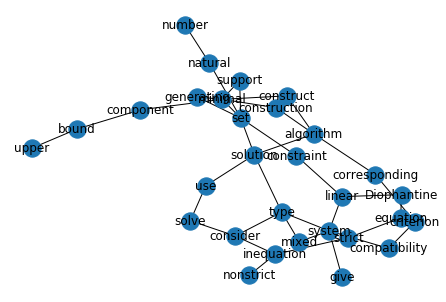

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(graph, pos, labels)

In [77]:
ranks = nx.pagerank(graph)
ranks

{0: 0.02454710501782348,
 1: 0.07883818813397488,
 2: 0.042073911309562013,
 3: 0.02236063299123213,
 4: 0.07924352805417181,
 5: 0.027663093364345394,
 6: 0.01675664351838784,
 7: 0.02628342624067896,
 8: 0.02545458838307635,
 9: 0.027089978802153438,
 10: 0.02652393521246918,
 11: 0.047104500480143544,
 12: 0.02502044839873248,
 13: 0.033763787713243634,
 14: 0.019163349284110898,
 15: 0.033323392320149345,
 16: 0.02832030349584278,
 17: 0.06463518976102747,
 18: 0.05797062864286218,
 19: 0.04405352193022517,
 20: 0.023518613278606198,
 21: 0.022576709832990604,
 22: 0.04873776072095226,
 23: 0.013376481462984216,
 24: 0.025532282621713576,
 25: 0.023518613278606198,
 26: 0.022576709832990604,
 27: 0.023680377765657637,
 28: 0.024630270521940764,
 29: 0.021662027629344972}

In [78]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(node_id, rank, labels[node_id])

4 0.07924352805417181 set
1 0.07883818813397488 system
17 0.06463518976102747 minimal
18 0.05797062864286218 solution
22 0.04873776072095226 type
11 0.047104500480143544 inequation
19 0.04405352193022517 algorithm
2 0.042073911309562013 linear
13 0.033763787713243634 consider
15 0.033323392320149345 bound
16 0.02832030349584278 component
5 0.027663093364345394 natural
9 0.027089978802153438 equation
10 0.02652393521246918 strict
7 0.02628342624067896 criterion
24 0.025532282621713576 corresponding
8 0.02545458838307635 Diophantine
12 0.02502044839873248 nonstrict
28 0.024630270521940764 solve
0 0.02454710501782348 compatibility
27 0.023680377765657637 use
20 0.023518613278606198 construction
25 0.023518613278606198 construct
21 0.022576709832990604 generating
26 0.022576709832990604 support
3 0.02236063299123213 constraint
29 0.021662027629344972 mixed
14 0.019163349284110898 upper
6 0.01675664351838784 number
23 0.013376481462984216 give


In [91]:
import math

phrases = {}

for chunk in doc.noun_chunks:
    sq_sum_rank = 0.0
    skipped = 0
    compound_key = set([])
    
    for i in range(chunk.start, chunk.end):
        token = doc[i]
        key = (token.lemma_, token.pos_)
        
        if key in seen:
            node_id = list(seen.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        
            print(" ", token.lemma_, token.pos_, node_id, rank)
        else:
            skipped += 1

    chunk_len = chunk.end - chunk.start + 1
    point_estimate = chunk_len / (chunk_len + skipped + 1.0)

    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + skipped)) # root mean square
    phrase_rank *= point_estimate
    
    phrase = chunk.text.lower()
    compound_key = tuple(sorted(list(compound_key)))
    
    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )


    print(phrase_rank, chunk.text, chunk.start, chunk.end, chunk_len)

  compatibility NOUN 0 0.02454710501782348
0.07385737760158423 Compatibility 0 1 2
  system NOUN 1 0.07883818813397488
0.13236161589790874 systems 2 3 2
  linear ADJ 2 0.042073911309562013
  constraint NOUN 3 0.02236063299123213
0.10991577255516563 linear constraints 4 6 3
  set NOUN 4 0.07924352805417181
0.08445068102079144 the set 7 9 3
  natural ADJ 5 0.027663093364345394
  number NOUN 6 0.01675664351838784
0.09126171522337548 natural numbers 10 12 3
  criterion NOUN 7 0.02628342624067896
0.0764248741367465 Criteria 13 14 2
  compatibility NOUN 0 0.02454710501782348
0.07385737760158423 compatibility 15 16 2
  system NOUN 1 0.07883818813397488
0.08423441655319835 a system 17 19 3
  linear ADJ 2 0.042073911309562013
  Diophantine PROPN 8 0.02545458838307635
  equation NOUN 9 0.027089978802153438
0.12304046716087634 linear Diophantine equations 20 23 4
  strict ADJ 10 0.02652393521246918
  inequation NOUN 11 0.047104500480143544
0.11749609224295456 strict inequations 24 26 3
  nonstric

In [102]:
import operator
min_phrases = {}

for phrase, rank_tuples in phrases.items():
    l = list(rank_tuples)
    l.sort(key=operator.itemgetter(1), reverse=True)
    phrase, rank = l[0]
    min_phrases[phrase] = rank

In [103]:
for phrase, rank in sorted(min_phrases.items(), key=lambda x: x[1], reverse=True):
    print(phrase, rank)

minimal generating sets 0.16319579781265933
systems 0.13236161589790874
linear diophantine equations 0.12304046716087634
a minimal supporting set 0.11897215262125786
strict inequations 0.11749609224295456
nonstrict inequations 0.11629027437747858
mixed types 0.11489108022679884
solutions 0.11350049304137863
a minimal set 0.11308943081186254
linear constraints 0.10991577255516563
upper bounds 0.09920314536746702
algorithms 0.09894276901345564
all the considered types systems 0.09467480498121825
natural numbers 0.09126171522337548
the set 0.08445068102079144
components 0.07933095724150788
the corresponding algorithms 0.07864734483160396
criteria 0.0764248741367465
compatibility 0.07385737760158423
construction 0.07229355784824075
all types 0.06622989102275274


In [104]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(labels[node_id], rank)

set 0.07924352805417181
system 0.07883818813397488
minimal 0.06463518976102747
solution 0.05797062864286218
type 0.04873776072095226
inequation 0.047104500480143544
algorithm 0.04405352193022517
linear 0.042073911309562013
consider 0.033763787713243634
bound 0.033323392320149345
component 0.02832030349584278
natural 0.027663093364345394
equation 0.027089978802153438
strict 0.02652393521246918
criterion 0.02628342624067896
corresponding 0.025532282621713576
Diophantine 0.02545458838307635
nonstrict 0.02502044839873248
solve 0.024630270521940764
compatibility 0.02454710501782348
use 0.023680377765657637
construction 0.023518613278606198
construct 0.023518613278606198
generating 0.022576709832990604
support 0.022576709832990604
constraint 0.02236063299123213
mixed 0.021662027629344972
upper 0.019163349284110898
number 0.01675664351838784
give 0.013376481462984216
